# Experiment: Standart Tokenizer vs BytePairEncoding

### BytePairEncoding

In [3]:
from Tokenizer import load_sst_data, word_freq_dictionary, tokenize, clean
from bytepairencoding.BytePairEncoder import BytePairEncoder

In [4]:
dim = 5000

In [5]:
# Loading datasets
dataset = dict()
for data in ('train', 'test', 'dev'):
    dataset[data] = load_sst_data(f"./data/{data}.txt")

In [33]:
word_freq = word_freq_dictionary(dataset['train'], sep=' ')
word_freq.head()

,word,freq
4,t h e,5954
26,a,4361
14,a n d,3831
46,o f,3631
18,t o,2438


In [34]:
tokenizer = BytePairEncoder(dim)
tokenizer.train(word_freq["word"], word_freq["freq"])

Trained 5000 tokens in  1490.35s


In [35]:
tokenizer.vocab

{'flicks',
 'pro',
 'toler',
 'answer',
 'diatribes',
 'simply',
 'overcome',
 'complexity',
 'how',
 'york',
 'keeps',
 'ther',
 'format',
 'wendigo',
 'spot',
 'revision',
 'kis',
 'thetic',
 'sounds',
 'mart',
 'meandering',
 'bu',
 'illust',
 'tian',
 'wa',
 'cases',
 'hur',
 'ia',
 'ler',
 'chop',
 'intellect',
 'piece',
 'singer',
 'cul',
 'dares',
 'jective',
 'inev',
 'expe',
 'ain',
 'consum',
 'imitation',
 'celebr',
 'complicated',
 'deta',
 'mouth',
 'strugg',
 'alist',
 'mix',
 'uality',
 'ttes',
 'europe',
 'colle',
 'poss',
 'ger',
 'mendes',
 'manifesto',
 'screwed',
 'respect',
 'hash',
 'femin',
 'onesque',
 'bour',
 'wi',
 'vol',
 'torn',
 'satisfy',
 'figu',
 'delivers',
 'exerc',
 'chills',
 'simp',
 'ray',
 'manif',
 'audiences',
 'definite',
 'death',
 'lighthearted',
 'finished',
 'craw',
 'reasonably',
 'prac',
 'stop',
 'sie',
 'douglas',
 'escapes',
 'cannon',
 'dee',
 'disguise',
 'oud',
 'ager',
 'modest',
 'iding',
 'astic',
 'mp',
 'fam',
 'nar',
 'female

In [36]:
words = [
     'lessons',
     'stilted',
     'bond',
     'relentlessly',
     'caper',
     'dysfunctional',
     'multiplex',
     'pleasant',
     'asaaaa'
        ]

for word in words:
    code = tokenizer.encode(word)
    n_word = tokenizer.decode(code)
    print(word, code, n_word)

lessons [4556, 19] lessons
stilted [253, 12, 543] stilted
bond [4364, 4] bond
relentlessly [2007, 2156] relentlessly
caper [414, 28] caper
dysfunctional [161, 19, 255, 509, 48] dysfunctional
multiplex [4413, 24] multiplex
pleasant [467] pleasant
asaaaa [36, 4071] asaaaa


In [40]:
for word in dataset['train'][0]["text"].split():
    print(clean(word, ''))

yet
another
entry
in
the
sentimental
ohthosewackybrits
genre
that
was
ushered
in
by
the
full
monty
and
is
still
straining
to
produce
another
smash
hit



In [52]:
import numpy as np

def one_hot_encoder(sequence, dim):
    v = np.zeros(dim)
    for i in sequence:
        if 0 <= i < dim:
            v[i] += 1
    return v

def generate_data(dataset, dim):
    n = len(dataset)
    X = np.zeros((n, dim))
    y = np.zeros(n)
    for i, line in enumerate(dataset):
        sentence = []
        for word in tokenize(line['text']):
            clean_word = clean(word, '')
            if len(clean_word)>0:
                sentence.extend(tokenizer.encode(clean_word))
        X[i,:] = one_hot_encoder(sentence, dim)
        y[i] = line['label']
    
    return X, y

In [53]:
X_train, y_train = generate_data(dataset["train"], dim)
X_test, y_test = generate_data(dataset["test"], dim)
X_dev, y_dev = generate_data(dataset["dev"], dim)

In [54]:
import tensorflow as tf
import math as m
dim = 5000

units = 128

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=units, input_shape=(dim,), activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(units=1, activation='sigmoid', name='output_layer')
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 128)               640128    
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 640257 (2.44 MB)
Trainable params: 640257 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
history = model.fit(x=X_train, y=y_train, epochs=50, validation_data=(X_dev, y_dev), callbacks=[callback])

Epoch 1/50


217/217 [==============================] - 4s 10ms/step - loss: 0.5710 - accuracy: 0.7051 - val_loss: 0.4745 - val_accuracy: 0.7706
Epoch 2/50
217/217 [==============================] - 2s 8ms/step - loss: 0.3336 - accuracy: 0.8655 - val_loss: 0.4735 - val_accuracy: 0.7810
Epoch 3/50
217/217 [==============================] - 2s 8ms/step - loss: 0.2096 - accuracy: 0.9262 - val_loss: 0.5372 - val_accuracy: 0.7856
Epoch 4/50
217/217 [==============================] - 2s 8ms/step - loss: 0.1303 - accuracy: 0.9613 - val_loss: 0.5974 - val_accuracy: 0.7913
Epoch 5/50
217/217 [==============================] - 2s 8ms/step - loss: 0.0774 - accuracy: 0.9811 - val_loss: 0.6511 - val_accuracy: 0.8005
Epoch 6/50
217/217 [==============================] - 2s 8ms/step - loss: 0.0463 - accuracy: 0.9925 - val_loss: 0.7392 - val_accuracy: 0.8005
Epoch 7/50
217/217 [==============================] - 2s 8ms/step - loss: 0.0287 - accuracy: 0.9952 - val_loss: 0.7870 - val_accuracy: 0.8062
Epo

In [56]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

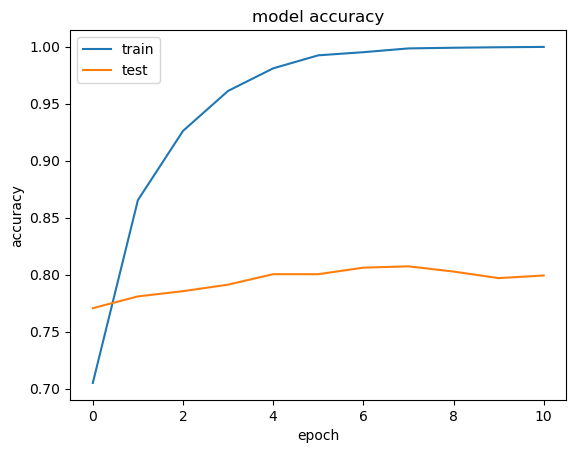

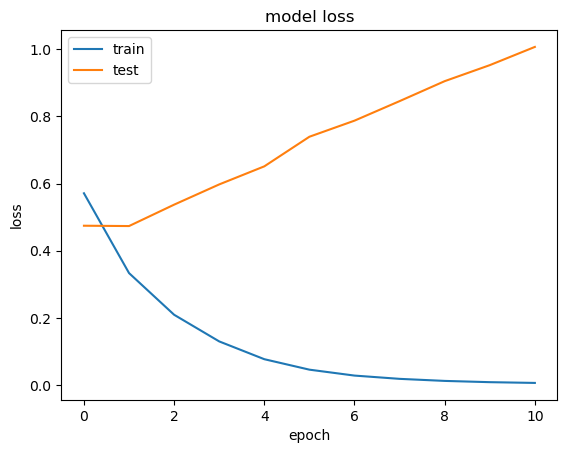

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate(X, y, model):
    y_p = (model.predict(X)>=0.5).astype(float).flatten()
    return [accuracy_score(y, y_p), precision_score(y, y_p), recall_score(y, y_p), f1_score(y, y_p)]

def get_df(model, train, test, dev):
    data = []
    for dataset in (train, test, dev):
        X, y = dataset
        data.append(evaluate(X, y, model))
    return pd.DataFrame(data, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=["Train", "Test", "Dev"])

In [58]:
get_df(model, (X_train, y_train), (X_test, y_test), (X_dev, y_dev))

28/28 [==============================] - 0s 3ms/step


,Accuracy,Precision,Recall,F1
Train,0.999855,1.000000,0.999723,0.999861
Test,0.771005,0.766234,0.778878,0.772504
Dev,0.799312,0.802247,0.804054,0.803150


In [62]:
import string

for l in string.ascii_lowercase:
    print(tokenizer.encode(l))

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]


In [97]:
print(X_train[:, :27].sum(axis=1).mean(), X_train[:, 27:].sum(axis=1).mean())
print(X_test[:, :27].sum(axis=1).mean(), X_test[:, 27:].sum(axis=1).mean())
print(X_dev[:, :27].sum(axis=1).mean(), X_dev[:, 27:].sum(axis=1).mean())

2.286994219653179 20.471531791907516
2.401976935749588 20.771004942339374
2.4575688073394497 21.06422018348624
